In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

# Imports
# MNIST not in Tensor format yet -> transforms.ToTensor
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()])) 

test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()])) 

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [4]:
# build neural network
class Net(nn.Module): # inherit from nn.Module
    
    def __init__(self):
        super().__init__() # run initialization for nn.Module
        self.fc1 = nn.Linear(28*28, 64) # first fully connected layer, 64 arbitrary
        self.fc2 = nn.Linear(64, 64) # has to take the output from first layer
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # 10 classes: 0,1,2,3,4,5,6,7,8,9
    
    def forward(self, x):
        # feed-forward neural network, x passes through all layers
        x = F.relu(self.fc1(x)) # activation function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # output layer
        return F.log_softmax(x, dim=1) # add softmax activation to output
        
# STATE MODEL        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [13]:
# pass data through Neural Network
X = torch.rand((28,28))
X = X.view(-1, 28*28) # -1 means "any size"

In [14]:
output = net(X)

In [15]:
output

tensor([[-2.1875, -2.2766, -2.3346, -2.3528, -2.4070, -2.3551, -2.4829, -2.2057,
         -2.2423, -2.2223]], grad_fn=<LogSoftmaxBackward>)

In [17]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001) # learning rate

EPOCHS = 3 # number of whole passes through entire dataset

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of features and labels
        X, y = data
        net.zero_grad() # we want to start at 0 with these gradients
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y) # our dataset has scalar value output, for OH encoded choose mean squared error
        loss.backward() # backpropagate results
        optimizer.step()
    print(loss)

tensor(0.0022, grad_fn=<NllLossBackward>)
tensor(0.0247, grad_fn=<NllLossBackward>)
tensor(0.0145, grad_fn=<NllLossBackward>)


In [18]:
# How correct were we?
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total +=1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.977


In [19]:
# last batch still stored
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

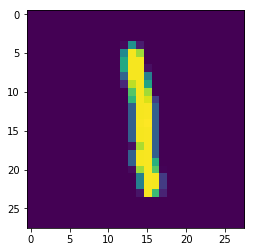

In [22]:
# plot first element of last batch
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [21]:
# prediction for first element of last batch
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(1)
